# 06. Model selection

### 1. Implement a linear model

* return the weight parameters w = (w1, w2, ... , wP) and the intercept parameter w0 separately where:


$$ \hat{y}(\vec{w}, \vec{x}) = w_0 + w_1 x_1 + ... + w_p x_p$$


* check your returned coefficients with the built in `LinearRegression` class from the `sklearn` library, they should be within tolerance `1e-6`to each other


* use a generated regression dataset `from sklearn.dataset import make_regression` API with parameters `n_samples=1000` and `n_features=20`

### 2. Use of real data

* download the [Communities and Crime Data Set](https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime) from UCI, the task includes understanding the dataset: naming the appropiate data fields, handling missing values, etc.
    
* fit a `LinearRegression` model with 5-fold cross-validation - compare training and testing scores (R^2 by default) for the different CV splits, print the mean score and its standard deviation

* find the best `Lasso` regression model with 5-fold grid search cross validation (`GridSearchCV`) on the parameters: `alpha, normalize, max_iter` and show the best parameter set


### 3. Shrinkage

* interpret Lasso model's findings based on its descriptive parameters by the shrinkage method described during the lecture (make a plot and check the names of the features that are not eliminated by the penalty parameter) on the data we have here (this is an explanatory data analysis problem, be to be creative)

* fit Ridge model and apply the shrinkage method as well, did you get what you expect?

* do you think normalization is needed here? If so, do not forget!

### 4. Subset selection

* Split the data to a training and test set and do recursive feature elimination until 10 remaining predictors with 5-fold cross-validated regressors (`RidgeCV`, `LassoCV`, `ElasticNetCV`) on the training set, plot their names and look up some of their meanings (recursive feature elimination is part of `sklearn` but you can do it with a for loop if you whish).

* Do all models provide the same descriptors? Check their performance on the test set! Plot all model predictions compared to the `y_test` on 3 different plots, which model seems to be the best?

### 5. ElasticNet penalty surface

* visualize the surface of the $ objective(\alpha, \beta) $ parameters corresponding to the L1 and L2 regularizations. Select the best possible combination of the hyper-parameters that minimize the objective (clue: `from scipy.optimize import minimize`)
    * this task is similar to what you've seen during class, just not for MSE vs. single penalty parameter but MSE vs. two penalty parameters $\alpha, \beta$

* interpret the findings! do you think linear models are powerful enough on this dataset?

### Hints:
 - On total you can get 10 points for fully completing all tasks.
 - Decorate your notebook with, questions, explanation etc, make it self contained and understandable!
 - Comments you code when necessary
 - Write functions for repetitive tasks!
 - Use the pandas package for data loading and handling
 - Use matplotlib and seaborn for plotting or bokeh and plotly for interactive investigation
 - Use the scikit learn package for almost everything
 - Use for loops only if it is really necessary!
 - Code sharing is not allowed between student! Sharing code will result in zero points.
 - If you use code found on web, it is OK, but, make its source clear! 

### 1. Implement a linear model

* return the weight parameters w = (w1, w2, ... , wP) and the intercept parameter w0 separately where:


$$ \hat{y}(\vec{w}, \vec{x}) = w_0 + w_1 x_1 + ... + w_p x_p$$


* check your returned coefficients with the built in `LinearRegression` class from the `sklearn` library, they should be within tolerance `1e-6`to each other


* use a generated regression dataset `from sklearn.dataset import make_regression` API with parameters `n_samples=1000` and `n_features=20`

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

In [2]:
data_X,data_y = make_regression(n_samples=1000,n_features=20)
df_X = pd.DataFrame(data_X)
df_y = pd.DataFrame(data_y)

df_X_const = df_X.copy()
df_X_const['const'] = 1

df_X_const_train = df_X_const[0::2]
df_y_train = df_y[0::2]


df_X_const_test = df_X_const[1::2]
df_y_test = df_y[1::2]


In [3]:
df_X_const.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,const
0,0.873207,-0.519308,-0.233270,-0.151931,-0.283755,1.154727,-0.562131,1.651802,0.521622,0.229834,...,-0.033022,-0.753053,-0.276253,1.942389,1.308674,0.889504,-1.181692,0.591074,-0.079650,1
1,1.568235,-1.138999,0.896279,0.630091,-0.823852,-0.339879,-0.756711,0.073072,-0.120860,0.815858,...,-0.263369,0.111425,-0.342294,-0.010382,-1.081532,0.651955,0.789643,1.157146,1.130693,1
2,-0.844776,0.266396,-0.416873,-1.097957,-0.510359,-0.435053,0.683131,-0.092146,0.070303,0.671077,...,-0.480976,0.231107,-0.778787,-1.072592,1.404823,0.206173,0.704284,-1.123180,0.527515,1
3,2.227037,1.006192,-0.780450,-2.077194,0.248495,-0.233832,-0.474254,-0.876592,-0.631053,-0.086919,...,0.074830,-0.255880,-0.038636,-0.479568,-0.539849,0.597179,-1.215149,-0.689631,-0.341116,1
4,1.480366,-2.276732,-1.483291,-0.930648,0.305582,0.175438,-1.036636,0.909443,0.489701,1.099689,...,0.284939,-1.398852,-0.195352,0.010100,-0.107868,0.093638,0.720963,-0.899357,0.510744,1


In [4]:
df_X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.873207,-0.519308,-0.233270,-0.151931,-0.283755,1.154727,-0.562131,1.651802,0.521622,0.229834,-0.295848,-0.033022,-0.753053,-0.276253,1.942389,1.308674,0.889504,-1.181692,0.591074,-0.079650
1,1.568235,-1.138999,0.896279,0.630091,-0.823852,-0.339879,-0.756711,0.073072,-0.120860,0.815858,-0.590594,-0.263369,0.111425,-0.342294,-0.010382,-1.081532,0.651955,0.789643,1.157146,1.130693
2,-0.844776,0.266396,-0.416873,-1.097957,-0.510359,-0.435053,0.683131,-0.092146,0.070303,0.671077,-1.389231,-0.480976,0.231107,-0.778787,-1.072592,1.404823,0.206173,0.704284,-1.123180,0.527515
3,2.227037,1.006192,-0.780450,-2.077194,0.248495,-0.233832,-0.474254,-0.876592,-0.631053,-0.086919,-2.588491,0.074830,-0.255880,-0.038636,-0.479568,-0.539849,0.597179,-1.215149,-0.689631,-0.341116
4,1.480366,-2.276732,-1.483291,-0.930648,0.305582,0.175438,-1.036636,0.909443,0.489701,1.099689,-0.210773,0.284939,-1.398852,-0.195352,0.010100,-0.107868,0.093638,0.720963,-0.899357,0.510744


In [5]:
def add_constant_col(data_X):
    ret_X = np.full((len(data_X),len(data_X[0])+1),1.)
    ret_X[:,1:] = data_X
    return ret_X


def linear_regression_matrix(df_X,df_y):
    data_X = df_X.to_numpy()
    data_y = df_y.to_numpy()
    
    omegas = np.linalg.inv(data_X.T.dot(data_X)).dot(data_X.T).dot(data_y)
    
    omega_0 = omegas[-1]
    omegas_coeff = omegas[:-1]
    return omega_0,omegas_coeff

In [6]:
omega_const, omegas = linear_regression_matrix(df_X_const_train,df_y_train)

In [7]:
linreg = LinearRegression().fit(df_X_const_train, df_y_train)

In [8]:
omegas_sk_round = np.round(linreg.coef_,6)
omegas_my_round = np.round(omegas,6)

In [9]:
omegas_my_round

array([[34.194312],
       [56.850298],
       [-0.      ],
       [39.873357],
       [ 0.      ],
       [81.36643 ],
       [-0.      ],
       [ 0.      ],
       [ 0.      ],
       [-0.      ],
       [ 0.      ],
       [53.71398 ],
       [18.142675],
       [51.269669],
       [-0.      ],
       [ 0.      ],
       [46.081768],
       [92.410447],
       [ 0.      ],
       [41.089021]])

In [10]:
omega_const

array([4.4408921e-16])

In [11]:
omegas_sk_round

array([[34.194312, 56.850298, -0.      , 39.873357, -0.      , 81.36643 ,
         0.      , -0.      , -0.      ,  0.      , -0.      , 53.71398 ,
        18.142675, 51.269669, -0.      ,  0.      , 46.081768, 92.410447,
         0.      , 41.089021,  0.      ]])

## Conclusion1:
* Linear regression can usually be solved by matrix inversion. Let's try this. Maybe it works.
* They're the same (with small error), the constant part is in different variable, but it's ok too.


### 2. Use of real data

* download the [Communities and Crime Data Set](https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime) from UCI, the task includes understanding the dataset: naming the appropiate data fields, handling missing values, etc.
    
* fit a `LinearRegression` model with 5-fold cross-validation - compare training and testing scores (R^2 by default) for the different CV splits, print the mean score and its standard deviation

* find the best `Lasso` regression model with 5-fold grid search cross validation (`GridSearchCV`) on the parameters: `alpha, normalize, max_iter` and show the best parameter set

In [12]:
from collections import Counter
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso



import re

In [13]:
names = '''@attribute state numeric
@attribute county numeric
@attribute community numeric
@attribute communityname string
@attribute fold numeric
@attribute population numeric
@attribute householdsize numeric
@attribute racepctblack numeric
@attribute racePctWhite numeric
@attribute racePctAsian numeric
@attribute racePctHisp numeric
@attribute agePct12t21 numeric
@attribute agePct12t29 numeric
@attribute agePct16t24 numeric
@attribute agePct65up numeric
@attribute numbUrban numeric
@attribute pctUrban numeric
@attribute medIncome numeric
@attribute pctWWage numeric
@attribute pctWFarmSelf numeric
@attribute pctWInvInc numeric
@attribute pctWSocSec numeric
@attribute pctWPubAsst numeric
@attribute pctWRetire numeric
@attribute medFamInc numeric
@attribute perCapInc numeric
@attribute whitePerCap numeric
@attribute blackPerCap numeric
@attribute indianPerCap numeric
@attribute AsianPerCap numeric
@attribute OtherPerCap numeric
@attribute HispPerCap numeric
@attribute NumUnderPov numeric
@attribute PctPopUnderPov numeric
@attribute PctLess9thGrade numeric
@attribute PctNotHSGrad numeric
@attribute PctBSorMore numeric
@attribute PctUnemployed numeric
@attribute PctEmploy numeric
@attribute PctEmplManu numeric
@attribute PctEmplProfServ numeric
@attribute PctOccupManu numeric
@attribute PctOccupMgmtProf numeric
@attribute MalePctDivorce numeric
@attribute MalePctNevMarr numeric
@attribute FemalePctDiv numeric
@attribute TotalPctDiv numeric
@attribute PersPerFam numeric
@attribute PctFam2Par numeric
@attribute PctKids2Par numeric
@attribute PctYoungKids2Par numeric
@attribute PctTeen2Par numeric
@attribute PctWorkMomYoungKids numeric
@attribute PctWorkMom numeric
@attribute NumIlleg numeric
@attribute PctIlleg numeric
@attribute NumImmig numeric
@attribute PctImmigRecent numeric
@attribute PctImmigRec5 numeric
@attribute PctImmigRec8 numeric
@attribute PctImmigRec10 numeric
@attribute PctRecentImmig numeric
@attribute PctRecImmig5 numeric
@attribute PctRecImmig8 numeric
@attribute PctRecImmig10 numeric
@attribute PctSpeakEnglOnly numeric
@attribute PctNotSpeakEnglWell numeric
@attribute PctLargHouseFam numeric
@attribute PctLargHouseOccup numeric
@attribute PersPerOccupHous numeric
@attribute PersPerOwnOccHous numeric
@attribute PersPerRentOccHous numeric
@attribute PctPersOwnOccup numeric
@attribute PctPersDenseHous numeric
@attribute PctHousLess3BR numeric
@attribute MedNumBR numeric
@attribute HousVacant numeric
@attribute PctHousOccup numeric
@attribute PctHousOwnOcc numeric
@attribute PctVacantBoarded numeric
@attribute PctVacMore6Mos numeric
@attribute MedYrHousBuilt numeric
@attribute PctHousNoPhone numeric
@attribute PctWOFullPlumb numeric
@attribute OwnOccLowQuart numeric
@attribute OwnOccMedVal numeric
@attribute OwnOccHiQuart numeric
@attribute RentLowQ numeric
@attribute RentMedian numeric
@attribute RentHighQ numeric
@attribute MedRent numeric
@attribute MedRentPctHousInc numeric
@attribute MedOwnCostPctInc numeric
@attribute MedOwnCostPctIncNoMtg numeric
@attribute NumInShelters numeric
@attribute NumStreet numeric
@attribute PctForeignBorn numeric
@attribute PctBornSameState numeric
@attribute PctSameHouse85 numeric
@attribute PctSameCity85 numeric
@attribute PctSameState85 numeric
@attribute LemasSwornFT numeric
@attribute LemasSwFTPerPop numeric
@attribute LemasSwFTFieldOps numeric
@attribute LemasSwFTFieldPerPop numeric
@attribute LemasTotalReq numeric
@attribute LemasTotReqPerPop numeric
@attribute PolicReqPerOffic numeric
@attribute PolicPerPop numeric
@attribute RacialMatchCommPol numeric
@attribute PctPolicWhite numeric
@attribute PctPolicBlack numeric
@attribute PctPolicHisp numeric
@attribute PctPolicAsian numeric
@attribute PctPolicMinor numeric
@attribute OfficAssgnDrugUnits numeric
@attribute NumKindsDrugsSeiz numeric
@attribute PolicAveOTWorked numeric
@attribute LandArea numeric
@attribute PopDens numeric
@attribute PctUsePubTrans numeric
@attribute PolicCars numeric
@attribute PolicOperBudg numeric
@attribute LemasPctPolicOnPatr numeric
@attribute LemasGangUnitDeploy numeric
@attribute LemasPctOfficDrugUn numeric
@attribute PolicBudgPerPop numeric
@attribute ViolentCrimesPerPop numeric
'''



names_valid = re.split('@attribute (.*)\n',names)
names_valid = [re.sub('numeric','',x) for x in names_valid if x!='']
names_valid = [re.sub('string','',x) for x in names_valid]
names_valid = [re.sub(' ','',x) for x in names_valid]

print(names_valid)

['state', 'county', 'community', 'communityname', 'fold', 'population', 'householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10', 'PctSpeakEnglOn

### 2. Use of real data

* download the [Communities and Crime Data Set](https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime) from UCI, the task includes understanding the dataset: naming the appropiate data fields, handling missing values, etc.
    
* fit a `LinearRegression` model with 5-fold cross-validation - compare training and testing scores (R^2 by default) for the different CV splits, print the mean score and its standard deviation

* find the best `Lasso` regression model with 5-fold grid search cross validation (`GridSearchCV`) on the parameters: `alpha, normalize, max_iter` and show the best parameter set

In [14]:
df_UCI = pd.read_csv('Data/communities.data',names=names_valid,na_values='?')
df_UCI.pop("state");
df_UCI.pop("county");
df_UCI.pop("community");
df_UCI.pop("communityname");
df_UCI.pop("fold");

df_UCI_y = df_UCI['ViolentCrimesPerPop'].copy()
df_UCI.pop("ViolentCrimesPerPop")

df_UCI = df_UCI.fillna(df_UCI.mean())


In [15]:
df_UCI.shape

(1994, 122)

In [16]:
df_UCI.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.290000,0.12,0.26,0.20,0.060000,0.040000,0.900000,0.500000,0.32,0.140000
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.305987,0.02,0.12,0.45,0.163103,0.076708,0.698589,0.440439,0.00,0.195078
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.305987,0.01,0.21,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.305987,0.02,0.39,0.28,0.163103,0.076708,0.698589,0.440439,0.00,0.195078
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.305987,0.04,0.09,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078


In [17]:
df_UCI.isna().sum().sum()

0

In [18]:
scores_linreg_e2 = []

kf = KFold(n_splits=5)
tmp = 1
for train_index, test_index in kf.split(df_UCI):
    X_train, X_test = df_UCI.iloc[train_index], df_UCI.iloc[test_index]
    y_train, y_test = df_UCI_y.iloc[train_index], df_UCI_y.iloc[test_index]
    
    linreg = LinearRegression().fit(X_train, y_train)
    scores_linreg_e2.append(linreg.score(X_train, y_train))

    print(tmp,'. fold, on train dataset, score value: ',linreg.score(X_train, y_train))
    print(tmp,'. fold, on test dataset, score value: ',linreg.score(X_test, y_test),'\n')
    tmp+=1
    
    
print('Mean of score: ',np.mean(scores_linreg_e2))
print('STD of score: ',np.std(scores_linreg_e2))


1 . fold, on train dataset, score value:  0.7141040285544635
1 . fold, on test dataset, score value:  0.6126658537433738 

2 . fold, on train dataset, score value:  0.7146496723068616
2 . fold, on test dataset, score value:  0.6086467428530511 

3 . fold, on train dataset, score value:  0.6904566882556263
3 . fold, on test dataset, score value:  0.7024591548826216 

4 . fold, on train dataset, score value:  0.6992160234786251
4 . fold, on test dataset, score value:  0.6685735292031327 

5 . fold, on train dataset, score value:  0.7103547279400773
5 . fold, on test dataset, score value:  -17.05649030443776 

Mean of score:  0.7057562281071308
STD of score:  0.009452782860156295


In [19]:
parameters_e2 = {'alpha':[1e-15,1e-10,1e-8,1e-4,1e-3,1e-2,1,5,10,20],
                 'normalize':[True,False],
                 'max_iter' :[100,130,150,160,175,200,250]}
#                  'max_iter':[1e3,1e4,1e5]}

lasso_regressor = GridSearchCV(Lasso(),parameters_e2,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(df_UCI,df_UCI_y)

/home/nemethg/Programs/Anaconda/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.58322816087745, tolerance: 0.008730651373040752
  positive)
/home/nemethg/Programs/Anaconda/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.92764633781288, tolerance: 0.008256076589341695
  positive)
/home/nemethg/Programs/Anaconda/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.323855837489628, tolerance: 0.008517425554858935
  positive)
/home/nemethg/Programs/Anaconda/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did no

/home/nemethg/Programs/Anaconda/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.867408957130076, tolerance: 0.008256076589341695
  positive)
/home/nemethg/Programs/Anaconda/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.255800496711892, tolerance: 0.008517425554858935
  positive)
/home/nemethg/Programs/Anaconda/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.398277246381733, tolerance: 0.008860422319749216
  positive)
/home/nemethg/Programs/Anaconda/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did 

/home/nemethg/Programs/Anaconda/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.505741145227427, tolerance: 0.008730651373040752
  positive)
/home/nemethg/Programs/Anaconda/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.837475273085463, tolerance: 0.008256076589341695
  positive)
/home/nemethg/Programs/Anaconda/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.22816857364728, tolerance: 0.008517425554858935
  positive)
/home/nemethg/Programs/Anaconda/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did n

/home/nemethg/Programs/Anaconda/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.96064494679248, tolerance: 0.008902159824561403
  positive)
/home/nemethg/Programs/Anaconda/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.52534431959763, tolerance: 0.008730651373040752
  positive)
/home/nemethg/Programs/Anaconda/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.867142135991354, tolerance: 0.008256076589341695
  positive)
/home/nemethg/Programs/Anaconda/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did no

/home/nemethg/Programs/Anaconda/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.227509397950813, tolerance: 0.008517425554858935
  positive)
/home/nemethg/Programs/Anaconda/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.376163615167687, tolerance: 0.008860422319749216
  positive)
/home/nemethg/Programs/Anaconda/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.937869995893635, tolerance: 0.008902159824561403
  positive)
/home/nemethg/Programs/Anaconda/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did 

/home/nemethg/Programs/Anaconda/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.225499574612623, tolerance: 0.008517425554858935
  positive)
/home/nemethg/Programs/Anaconda/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.375761328315686, tolerance: 0.008860422319749216
  positive)
/home/nemethg/Programs/Anaconda/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.928282088966949, tolerance: 0.008902159824561403
  positive)
/home/nemethg/Programs/Anaconda/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did 

/home/nemethg/Programs/Anaconda/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.82064594974199, tolerance: 0.008256076589341695
  positive)
/home/nemethg/Programs/Anaconda/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.188264042432236, tolerance: 0.008517425554858935
  positive)
/home/nemethg/Programs/Anaconda/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.339242391421566, tolerance: 0.008860422319749216
  positive)
/home/nemethg/Programs/Anaconda/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did n

/home/nemethg/Programs/Anaconda/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.286544055559002, tolerance: 0.008730651373040752
  positive)
/home/nemethg/Programs/Anaconda/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2468303935236591, tolerance: 0.008256076589341695
  positive)
/home/nemethg/Programs/Anaconda/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2624269167493978, tolerance: 0.008517425554858935
  positive)
/home/nemethg/Programs/Anaconda/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did n

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20],
                         'max_iter': [100, 130, 150, 160, 175, 200, 250],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [20]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 0.0001, 'max_iter': 150, 'normalize': False}
-0.018646899810247235


## Conclusion 2
* I dropped the non predictive columns
* And filled every nan values, with their column's mean.
* I used this link https://towardsdatascience.com/how-to-perform-lasso-and-ridge-regression-in-python-3b3b75541ad8 for the lasso GridSearchCV.

### 3. Shrinkage

* interpret Lasso model's findings based on its descriptive parameters by the shrinkage method described during the lecture (make a plot and check the names of the features that are not eliminated by the penalty parameter) on the data we have here (this is an explanatory data analysis problem, be to be creative)

* fit Ridge model and apply the shrinkage method as well, did you get what you expect?

* do you think normalization is needed here? If so, do not forget!

In [21]:
from sklearn.linear_model import Ridge


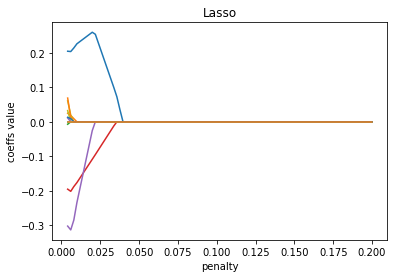

In [22]:
all_coeffs = []
alphas = []

for a in np.linspace(0.004, 0.2, 100):
    alphas.append(a)
    l = Lasso(alpha=a)
    l.fit(df_UCI, df_UCI_y)
    all_coeffs.append(l.coef_)
    
all_coeffs = np.array(all_coeffs)

plt.plot(alphas, all_coeffs)
plt.title('Lasso')
plt.xlabel('penalty')
plt.ylabel('coeffs value')
plt.show()



In [23]:
max_coeffs_Lasso = []
for i in range(len(all_coeffs)):
    max_coeffs_Lasso.append(max(abs(all_coeffs[i])))
N = 5    
first_N_features_idx = [max_coeffs_Lasso.index(x) for x in sorted(max_coeffs_Lasso,reverse=True)[:5]]
# print(max_coeffs_Lasso)
# print(first_N_features_idx)

print('First',N,' features: ')

first_N_features_names = ['mean people per household',
                          'population: population for community',
                          'racepctblack: percentage of population that is african american',
                          'agePct16t24: percentage of population that is 16-24 in age',
                          'agePct65up: percentage of population that is 65 and over in age']


for i in range(len(first_N_features_idx)):
    print(list(df_UCI.columns)[first_N_features_idx[i]],': ',first_N_features_names[i])
    

First 5  features: 
householdsize :  mean people per household
population :  population: population for community
racepctblack :  racepctblack: percentage of population that is african american
agePct16t24 :  agePct16t24: percentage of population that is 16-24 in age
agePct65up :  agePct65up: percentage of population that is 65 and over in age


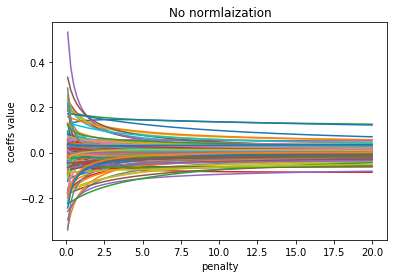

In [24]:
all_coeffs = []
alphas = []

for a in np.linspace(0.1, 20, 100):
    alphas.append(a)
    r = Ridge(alpha=a)
    r.fit(df_UCI, df_UCI_y)
    all_coeffs.append(r.coef_)
    
all_coeffs = np.array(all_coeffs)

plt.plot(alphas, all_coeffs)
plt.title('No normlaization')
plt.xlabel('penalty')
plt.ylabel('coeffs value')
plt.show()

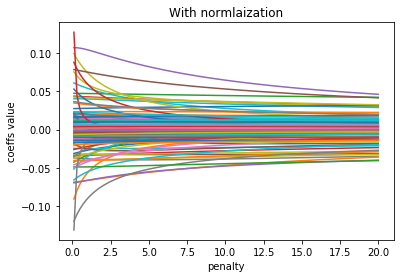

In [25]:
df_UCI_norm=(df_UCI-df_UCI.mean())/df_UCI.std()


all_coeffs = []
alphas = []

for a in np.linspace(0.1, 20, 100):
    alphas.append(a)
    r = Ridge(alpha=a)
    r.fit(df_UCI_norm, df_UCI_y)
    all_coeffs.append(r.coef_)
    
all_coeffs = np.array(all_coeffs)

plt.plot(alphas, all_coeffs)
plt.title('With normlaization')
plt.xlabel('penalty')
plt.ylabel('coeffs value')
plt.show()

## Conclusion 3
* yes, normalization is needed, it will dercrease the coefficient's values.

### 4. Subset selection

* Split the data to a training and test set and do recursive feature elimination until 10 remaining predictors with 5-fold cross-validated regressors (`RidgeCV`, `LassoCV`, `ElasticNetCV`) on the training set, plot their names and look up some of their meanings (recursive feature elimination is part of `sklearn` but you can do it with a for loop if you whish).

* Do all models provide the same descriptors? Check their performance on the test set! Plot all model predictions compared to the `y_test` on 3 different plots, which model seems to be the best?

In [26]:
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV

from sklearn.feature_selection import RFE


from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold


# from sklearn.svm import SVC

In [27]:
df_UCI_train = df_UCI.iloc[::2]
df_UCI_y_train = df_UCI_y.iloc[::2]

df_UCI_test = df_UCI.iloc[1::2]
df_UCI_y_test = df_UCI_y.iloc[1::2]




In [28]:
rCV = RidgeCV()
rCV_fe = RFE(rCV, n_features_to_select=10)
rCV_fe.fit(df_UCI_train,df_UCI_y_train)

rCV_fe_pred_y = rCV_fe.predict(df_UCI_test)

# rCV_fe.ranking_
print('RidgeCV:')
for i in rCV_fe.ranking_[:10]:
    print(i, list(df_UCI.columns)[i])

RidgeCV:
106 PctPolicBlack
63 PctLargHouseOccup
8 agePct16t24
1 householdsize
5 racePctHisp
15 pctWInvInc
84 RentHighQ
35 PctEmplProfServ
82 RentLowQ
52 PctImmigRecent


In [29]:
lCV = LassoCV()
lCV_fe = RFE(lCV, n_features_to_select=10)
lCV_fe.fit(df_UCI_train,df_UCI_y_train)

lCV_fe_pred_y = lCV_fe.predict(df_UCI_test)
lCV_fe.ranking_


/home/nemethg/Programs/Anaconda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/nemethg/Programs/Anaconda/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005184468024044264, tolerance: 0.003942901353383458
  tol, rng, random, positive)
/home/nemethg/Programs/Anaconda/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0073551603238417584, tolerance: 0.003942901353383458
  tol, rng, random, positive)
/home/nemethg/Programs/Anaconda/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: Convergen

/home/nemethg/Programs/Anaconda/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006766145159597059, tolerance: 0.003942901353383458
  tol, rng, random, positive)
/home/nemethg/Programs/Anaconda/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008189574210369699, tolerance: 0.003942901353383458
  tol, rng, random, positive)
/home/nemethg/Programs/Anaconda/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008627902493353545, tolerance: 0.003942901353383458
  tol, rng, random, positive)
/home/nemethg/Programs/Anaconda/lib/python3.7/site-packages/sklearn/model_selectio

/home/nemethg/Programs/Anaconda/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004978619721175193, tolerance: 0.0034875708872180457
  tol, rng, random, positive)
/home/nemethg/Programs/Anaconda/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004125153155539962, tolerance: 0.003942901353383458
  tol, rng, random, positive)
/home/nemethg/Programs/Anaconda/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007128819294827338, tolerance: 0.003942901353383458
  tol, rng, random, positive)
/home/nemethg/Programs/Anaconda/lib/python3.7/site-packages/sklearn/linear_model/

/home/nemethg/Programs/Anaconda/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005131465651679434, tolerance: 0.003942901353383458
  tol, rng, random, positive)
/home/nemethg/Programs/Anaconda/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007907323537347466, tolerance: 0.003942901353383458
  tol, rng, random, positive)
/home/nemethg/Programs/Anaconda/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008952998219413644, tolerance: 0.003942901353383458
  tol, rng, random, positive)
/home/nemethg/Programs/Anaconda/lib/python3.7/site-packages/sklearn/model_selectio

/home/nemethg/Programs/Anaconda/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005247731843997627, tolerance: 0.003942901353383458
  tol, rng, random, positive)
/home/nemethg/Programs/Anaconda/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0075578417629174055, tolerance: 0.003942901353383458
  tol, rng, random, positive)
/home/nemethg/Programs/Anaconda/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008418535757922285, tolerance: 0.003942901353383458
  tol, rng, random, positive)
/home/nemethg/Programs/Anaconda/lib/python3.7/site-packages/sklearn/model_selecti

/home/nemethg/Programs/Anaconda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/nemethg/Programs/Anaconda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/nemethg/Programs/Anaconda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/nemethg/Programs/Anaconda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it

/home/nemethg/Programs/Anaconda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/nemethg/Programs/Anaconda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/nemethg/Programs/Anaconda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/nemethg/Programs/Anaconda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it

/home/nemethg/Programs/Anaconda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/nemethg/Programs/Anaconda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/nemethg/Programs/Anaconda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/nemethg/Programs/Anaconda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it

array([113, 112,   1,   2,  13,  19,  28,  35,  40,  37,  45,  16,  50,
        14,  34,   6,  10,  47,  15,  38,  39,  22,  24,  29,  30,  12,
        23,  65,  17,  55,  67,  57,   3,  52,  70,  72,  74,  76,   1,
        79,  81,  84,  83,  61,   1,  85,  87,  88,   1,  92,   1,  96,
        89,  93,  97,  99, 101, 103, 105, 107, 109, 111, 110, 108, 106,
       104, 102, 100,   1,  86,  31,  41,   5,  42,   1,  21,  66,  68,
        32,  51,  63,  43,   1,  60,  11,   1,  18,  20,   7,   4,   1,
        33,  53,   9,   8,  36,  48,  54,  64,  56,  62,  58,  59,  49,
        69,  71,  73,  78,  80,  82,  75,  90,  91,  77,  94,  95,  26,
        44,  46,  25,  27,  98])

In [30]:
print('LassoCV:')
for i in lCV_fe.ranking_[:10]:
    print(i, list(df_UCI.columns)[i])

LassoCV:
113 LandArea
112 PolicAveOTWorked
1 householdsize
2 racepctblack
13 pctWWage
19 medFamInc
28 PctPopUnderPov
35 PctEmplProfServ
40 FemalePctDiv
37 PctOccupMgmtProf


In [31]:
eCV = ElasticNetCV()
eCV_fe = RFE(eCV, n_features_to_select=10)
eCV_fe.fit(df_UCI_train,df_UCI_y_train)

eCV_fe_pred_y = eCV_fe.predict(df_UCI_test)

eCV_fe.ranking_



/home/nemethg/Programs/Anaconda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/nemethg/Programs/Anaconda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/nemethg/Programs/Anaconda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/nemethg/Programs/Anaconda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it

/home/nemethg/Programs/Anaconda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/nemethg/Programs/Anaconda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/nemethg/Programs/Anaconda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/nemethg/Programs/Anaconda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it

/home/nemethg/Programs/Anaconda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/nemethg/Programs/Anaconda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/nemethg/Programs/Anaconda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/nemethg/Programs/Anaconda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it

/home/nemethg/Programs/Anaconda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/nemethg/Programs/Anaconda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/nemethg/Programs/Anaconda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/nemethg/Programs/Anaconda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it

array([113, 112,   1,   1,  23,   1,  32,  31,  44,  43,  41,  25,  54,
         5,  35,   6,  24,  52,  18,  57,  59,  13,  27,  33,  34,  16,
        26,  53,   8,  66,  69,   7,  10,  73,  74,  76,  78,  80,   1,
        84,  83,   1,  38,  63,   1,  85,  87,  88,   9,  92,   4,  96,
        89,  93,  97,  99, 101, 103, 105, 107, 109, 111, 110, 108, 106,
       104, 102, 100,  20,  86,  39,  47,  14,  65,   3,  12,  64,  68,
        37,  71,  72,  40,   1,  49,  21,   1,  17,  22,  15,  11,   1,
        30,  55,   1,   2,  42,  58,  60,  51,  70,  56,  46,  62,  45,
        75,  77,  79,  81,  82,  28,  61,  90,  91,  19,  94,  95,  67,
        48,  50,  29,  36,  98])

In [32]:
print('ElasticNetCV')
for i in eCV_fe.ranking_[:10]:
    print(i, list(df_UCI.columns)[i])

ElasticNetCV
113 LandArea
112 PolicAveOTWorked
1 householdsize
1 householdsize
23 indianPerCap
1 householdsize
32 PctUnemployed
31 PctBSorMore
44 PctKids2Par
43 PctFam2Par


Text(0.5, 1.0, 'Predict')

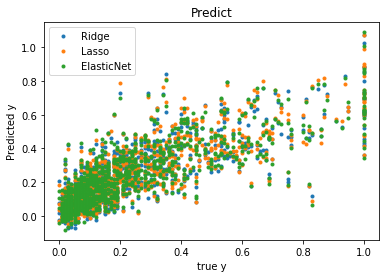

In [33]:
plt.plot(df_UCI_y_test,rCV_fe_pred_y,'.',label='Ridge')
plt.plot(df_UCI_y_test,lCV_fe_pred_y,'.',label='Lasso')
plt.plot(df_UCI_y_test,eCV_fe_pred_y,'.',label='ElasticNet')
plt.legend()
plt.xlabel('true y')
plt.ylabel('Predicted y')
plt.title('Predict')

# Conlusions4 :
* The 3 model predicted similar results. But there are some fifferences in the first N most important features.

### 5. ElasticNet penalty surface

* visualize the surface of the $ objective(\alpha, \beta) $ parameters corresponding to the L1 and L2 regularizations. Select the best possible combination of the hyper-parameters that minimize the objective (clue: `from scipy.optimize import minimize`)
    * this task is similar to what you've seen during class, just not for MSE vs. single penalty parameter but MSE vs. two penalty parameters $\alpha, \beta$

* interpret the findings! do you think linear models are powerful enough on this dataset?